# Import modules

In [280]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Read data source file

In [281]:

df = pd.read_csv("./case1201.csv")
df.head(8)

,State,SAT,Takers,Income,Years,Public,Expend,Rank
0,Iowa,1088,3,326,16.79,87.8,25.60,89.7
1,SouthDakota,1075,2,264,16.07,86.2,19.95,90.6
2,NorthDakota,1068,3,317,16.57,88.3,20.62,89.8
3,Kansas,1045,5,338,16.30,83.9,27.14,86.3
4,Nebraska,1045,5,293,17.25,83.6,21.05,88.5
5,Montana,1033,8,263,15.91,93.7,29.48,86.4
6,Minnesota,1028,7,343,17.41,78.3,24.84,83.4
7,Utah,1022,4,333,16.57,75.2,17.42,85.9


# Check information

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
State     50 non-null object
SAT       50 non-null int64
Takers    50 non-null int64
Income    50 non-null int64
Years     50 non-null float64
Public    50 non-null float64
Expend    50 non-null float64
Rank      50 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 3.2+ KB


In [283]:
total_records, column_len = df.shape
(column_len, total_records)

(8, 50)

In [284]:
df.describe()

,SAT,Takers,Income,Years,Public,Expend,Rank
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,947.940000,26.220000,293.980000,16.209200,81.204000,22.965600,79.988000
std,70.856397,22.022521,43.693034,0.699982,9.830917,6.144932,6.523072
min,790.000000,2.000000,208.000000,14.390000,44.800000,13.840000,69.800000
25%,889.250000,6.250000,261.500000,15.910000,76.925000,19.592500,74.025000
50%,966.000000,16.000000,295.000000,16.360000,80.800000,21.610000,80.850000
75%,998.500000,47.750000,325.000000,16.757500,88.250000,26.387500,85.825000
max,1088.000000,69.000000,401.000000,17.410000,97.000000,50.100000,90.600000


In [285]:
## null checking
df.isnull().any().any()

False

# Check tied values

In [298]:
def show_count(grouped, threshold):
    dg = grouped.size().to_frame('count')
    print(dg[dg['count'] > threshold])

In [301]:
show_count(df[['Takers']].groupby(['Takers']), 1)

        count
Takers       
3           3
4           2
5           5
6           2
7           3
8           2
10          3
16          2
47          2
48          2
50          2
59          2


In [302]:
show_count(df[['Public']].groupby(['Public']), 1)

        count
Public       
67.9        2
80.4        2
80.7        2
88.3        2
92.1        2


In [303]:
show_count(df[['Expend']].groupby(['Expend']), 1)

Empty DataFrame
Columns: [count]
Index: []


In [304]:
show_count(df[['Rank']].groupby(['Rank']), 1)

      count
Rank       
69.8      2
69.9      2
71.4      2
74.0      2
74.6      2
81.8      2
83.4      2
85.9      2
86.4      2


# Normal distribution checking

In [144]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from statsmodels.graphics.gofplots import qqplot

SAT = df['SAT']
Takers = df['Takers']
Income = df['Income']
Years = df['Years']
Public = df['Public']
Expend = df['Expend']
Rank = df['Rank']


def interpret(sig_level, p_value):
    if p > sig_level:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



### SAT

(array([  1.,   2.,   5.,  12.,   3.,   3.,  11.,   7.,   3.,   3.]),
 array([  790. ,   819.8,   849.6,   879.4,   909.2,   939. ,   968.8,
          998.6,  1028.4,  1058.2,  1088. ]),
 <a list of 10 Patch objects>)

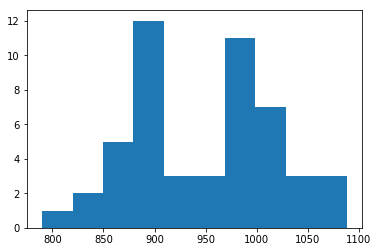

In [145]:
## histogram plot
plt.hist(SAT)

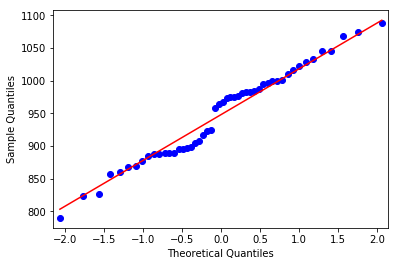

In [146]:
## Quantile-Quantile plot
qqplot(SAT, line='s')
plt.show()

In [147]:
## using Shapiro-Wilk Test
stat, p = shapiro(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.969, p=0.218


In [148]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [149]:
## D’Agostino’s K^2 Test
stat, p = normaltest(SAT)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.270, p=0.321


In [150]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


### Takers

(array([ 18.,   6.,   4.,   0.,   2.,   4.,   5.,   5.,   3.,   3.]),
 array([  2. ,   8.7,  15.4,  22.1,  28.8,  35.5,  42.2,  48.9,  55.6,
         62.3,  69. ]),
 <a list of 10 Patch objects>)

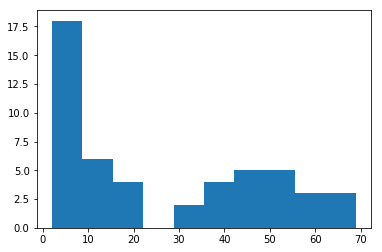

In [151]:
## histogram plot
plt.hist(Takers)

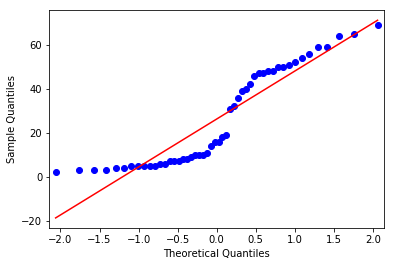

In [152]:
## Quantile-Quantile plot
qqplot(Takers, line='s')
plt.show()

In [153]:
## using Shapiro-Wilk Test
stat, p = shapiro(Takers)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.849, p=0.000


In [154]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


In [155]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Takers)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=29.385, p=0.000


In [156]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


### Income

(array([ 4.,  4.,  7.,  4.,  9.,  9.,  9.,  2.,  0.,  2.]),
 array([ 208. ,  227.3,  246.6,  265.9,  285.2,  304.5,  323.8,  343.1,
         362.4,  381.7,  401. ]),
 <a list of 10 Patch objects>)

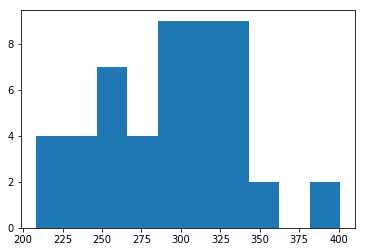

In [157]:
## histogram plot
plt.hist(Income)

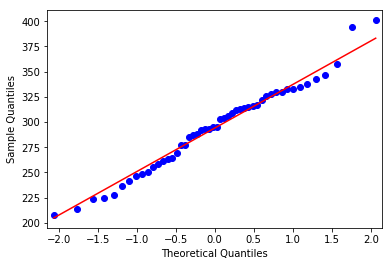

In [158]:
## Quantile-Quantile plot
qqplot(Income, line='s')
plt.show()

In [159]:
## using Shapiro-Wilk Test
stat, p = shapiro(Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.980, p=0.560


In [160]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [161]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Income)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.061, p=0.970


In [162]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


### Years

(array([  2.,   2.,   0.,   6.,   2.,  10.,   9.,   9.,   7.,   3.]),
 array([ 14.39 ,  14.692,  14.994,  15.296,  15.598,  15.9  ,  16.202,
         16.504,  16.806,  17.108,  17.41 ]),
 <a list of 10 Patch objects>)

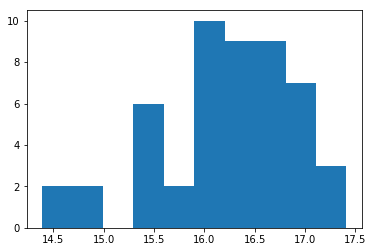

In [163]:
## histogram plot
plt.hist(Years)

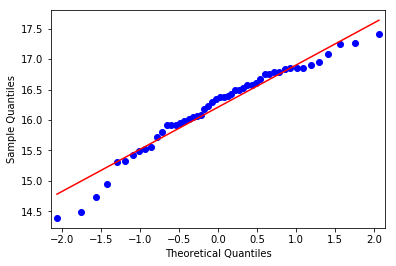

In [164]:
## Quantile-Quantile plot
qqplot(Years, line='s')
plt.show()

In [165]:
## using Shapiro-Wilk Test
stat, p = shapiro(Years)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.954, p=0.052


In [166]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


In [167]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Years)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=5.155, p=0.076


In [168]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample looks Gaussian (fail to reject H0)


### Public

(array([  1.,   0.,   0.,   1.,   5.,   5.,  14.,   8.,  10.,   6.]),
 array([ 44.8 ,  50.02,  55.24,  60.46,  65.68,  70.9 ,  76.12,  81.34,
         86.56,  91.78,  97.  ]),
 <a list of 10 Patch objects>)

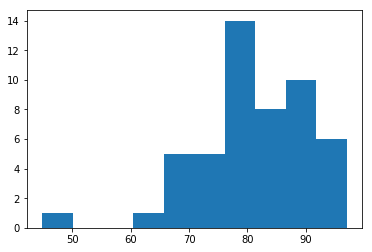

In [169]:
## histogram plot
plt.hist(Public)

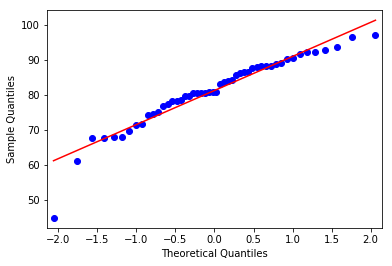

In [170]:
## Quantile-Quantile plot
qqplot(Public, line='s')
plt.show()

In [171]:
## using Shapiro-Wilk Test
stat, p = shapiro(Public)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.933, p=0.007


In [172]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


In [173]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Public)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=15.732, p=0.000


In [174]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


### Expend

(array([  8.,  15.,   8.,  14.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([ 13.84 ,  17.466,  21.092,  24.718,  28.344,  31.97 ,  35.596,
         39.222,  42.848,  46.474,  50.1  ]),
 <a list of 10 Patch objects>)

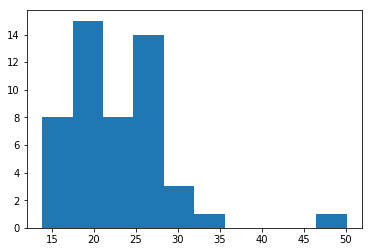

In [175]:
## histogram plot
plt.hist(Expend)

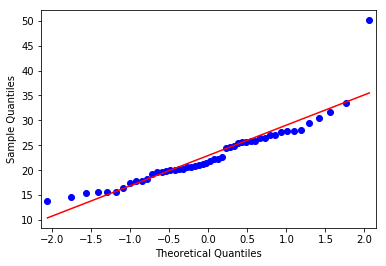

In [176]:
## Quantile-Quantile plot
qqplot(Expend, line='s')
plt.show()

In [177]:
## using Shapiro-Wilk Test
stat, p = shapiro(Expend)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.874, p=0.000


In [178]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


In [179]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Expend)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=32.448, p=0.000


In [180]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


### Rank

(array([ 8.,  3.,  7.,  2.,  4.,  4.,  8.,  7.,  2.,  5.]),
 array([ 69.8 ,  71.88,  73.96,  76.04,  78.12,  80.2 ,  82.28,  84.36,
         86.44,  88.52,  90.6 ]),
 <a list of 10 Patch objects>)

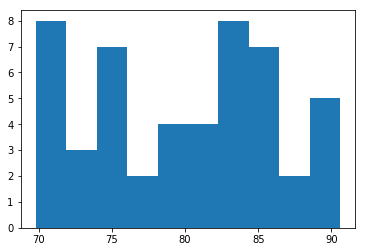

In [181]:
## histogram plot
plt.hist(Rank)

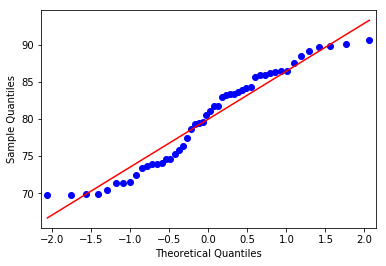

In [182]:
## Quantile-Quantile plot
qqplot(Rank, line='s')
plt.show()

In [183]:
## using Shapiro-Wilk Test
stat, p = shapiro(Rank)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.936, p=0.009


In [184]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


In [185]:
## D’Agostino’s K^2 Test
stat, p = normaltest(Rank)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=17.347, p=0.000


In [186]:
# Adopt h1 if p more than 0.05 significance level.
interpret(0.05, p)

Sample does not look Gaussian (reject H0)


# Correlation test

In [187]:
from scipy.stats import pearsonr
from scipy.stats import linregress

def correlation_interpret(sig_level, p_value):
    if p > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: p=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: p=0)' %(sig_level))

### SAT - Income

In [188]:
r, p = pearsonr(Income, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.584, p-value=0.000
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [206]:
slope, intercept, r_value, p_value, std_err = linregress(Income, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=0.948, intercept=669.299, correlation=0.584, p-value=0.000, std-err=0.190


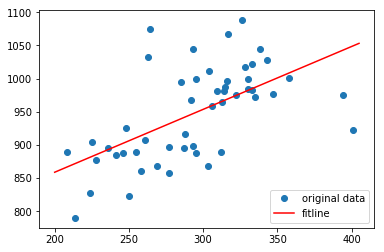

In [208]:
x_plot = 5 * np.array(range(40,82))
plt.plot(Income, SAT, 'o', label='original data')
plt.plot(x_plot, intercept + slope*x_plot, 'r', label='fitline')
plt.legend(loc='lower right')

### SAT - Years

In [191]:
r, p = pearsonr(Years, SAT)
print("pearson's coefficient=%.3f, p-value=%.3f" % (r, p))

correlation_interpret(0.05, p)

pearson's coefficient=0.331, p-value=0.019
There is correlation between 2 varables at alpha=0.050 (reject H0: p=0)


In [209]:
slope, intercept, r_value, p_value, std_err = linregress(Years, SAT)
print("slope=%.3f, intercept=%.3f, correlation=%.3f, p-value=%.3f, std-err=%.3f" % (slope, intercept, r_value, p_value, std_err))

slope=33.503, intercept=404.889, correlation=0.331, p-value=0.019, std-err=13.787


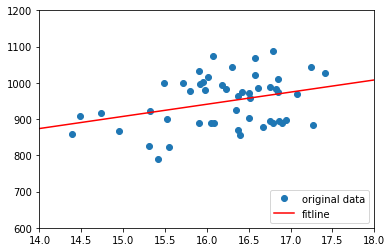

In [211]:
x_plot = 0.3 * np.array(range(15,65))
plt.axis([14,18,600,1200])
plt.plot(Years, SAT, 'o', label='original data')
plt.plot(x_plot, intercept + slope*x_plot, 'r', label='fitline')
plt.legend(loc='lower right')

### SAT - Takers

In [325]:
from scipy.stats import kendalltau

def tau_interpret(sig_level, p_value):
    if p_value > sig_level:
        print('There is no correlation between 2 variables (fail to reject H0: tau=0)')
    else:
        print('There is correlation between 2 varables at alpha=%.3f (reject H0: tau=0)' %(sig_level))

In [326]:
tau, p_value = kendalltau(Takers, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.6612, p-value=0.0000


In [327]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)


 ### SAT - Public

In [328]:
tau, p_value = kendalltau(Public, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0312, p-value=0.7505


In [329]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


### SAT - Expend

In [330]:
tau, p_value = kendalltau(Expend, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=-0.0303, p-value=0.7569


In [331]:
tau_interpret(0.05, p_value)

There is no correlation between 2 variables (fail to reject H0: tau=0)


### SAT - Rank

In [332]:
tau, p_value = kendalltau(Rank, SAT)
print("tau=%.4f, p-value=%.4f" % (tau, p_value))

tau=0.6932, p-value=0.0000


In [333]:
tau_interpret(0.05, p_value)

There is correlation between 2 varables at alpha=0.050 (reject H0: tau=0)
